In [96]:
#!unzip -q '/content/sample_data/NIPS Papers.zip' -d '/content/sample_data/'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
import pandas as pd
import os
os.chdir('/content/sample_data/')
# Read data into papers
papers = pd.read_csv('NIPS Papers/papers.csv')
# Print head
papers.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


#Since the goal of this analysis is to perform topic modeling, let’s focus only on the text data from each paper, and drop other metadata columns.

In [98]:
papers=papers.drop(columns=['id','event_type','pdf_name'])
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [99]:
#*************************************Removing Stopwords *******************************
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords',quiet=True)
#print(stopwords.words('english'))
def remove_stopwords(text):
  clean_text=' '.join([i for i in text.split() if i not in stopwords.words('english')])
  return clean_text

papers['title']=papers['title'].apply(lambda x:remove_stopwords(x))

#*************************************Removing Punctuations *******************************
import string

def remove_punctuation(text):
  cleantext=''.join([i for i in text if i not in string.punctuation])
  return cleantext

papers['title']=papers['title'].apply(lambda x:remove_punctuation(x))

#*************************************Lowering the Text *******************************
papers['title']=papers['title'].str.lower()

#*************************************Stemming *******************************
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stemming(text):
  clean_text=' '.join([ps.stem(i) for i in text.split()])
  return clean_text

papers['title']=papers['title'].apply(lambda x:stemming(x))

#*************************************Lemmatization *******************************
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
nltk.download('wordnet',quiet=True)
def Lemmatize(text):
  clean_text=' '.join([wl.lemmatize(i) for i in text.split()])
  return clean_text

papers['title']=papers['title'].apply(lambda x:Lemmatize(x))
papers['title']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                      selforgan associ databas it applic
1       a mean field theori layer iv visual cortex it ...
2       store covari associ longterm potenti depress s...
3           bayesian queri construct neural network model
4          neural network ensembl cross valid activ learn
                              ...                        
6555                        singl transistor learn synaps
6556                 bia varianc combin least squar estim
6557                 a real time cluster cmo neural engin
6558    learn direct global motion two class psychophy...
6559    correl interpol network realtim express analys...
Name: title, Length: 6560, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


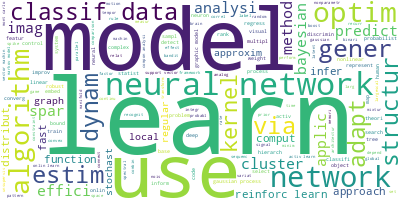

In [100]:
from wordcloud import WordCloud
long_string=' '.join(list(papers['title'].values))
# Create a WordCloud object
visual_representation = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
visual_representation.generate(long_string)
# Visualize the word cloud
visual_representation.to_image()


# Tokenization
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text. Next, we convert the tokenized object into a corpus and dictionary.

In [57]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF=tfidf.fit_transform(papers['title'])
print("\nVocabulary:")
print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())'''



Vocabulary:
{'selforgan': 3624, 'associ': 221, 'databa': 889, 'applic': 183, 'mean': 2319, 'field': 1373, 'theori': 4105, 'layer': 2070, 'iv': 1955, 'visual': 4408, 'cortex': 807, 'artifici': 211, 'neural': 2659, 'network': 2656, 'store': 3919, 'covari': 828, 'longterm': 2186, 'potenti': 3109, 'depress': 959, 'synapt': 4033, 'strength': 3928, 'hippocampu': 1694, 'bayesian': 318, 'queri': 3263, 'construct': 753, 'model': 2449, 'ensembl': 1213, 'cross': 845, 'valid': 4347, 'activ': 55, 'learn': 2083, 'use': 4337, 'net': 2655, 'instanti': 1877, 'deform': 933, 'plasticitymedi': 3054, 'competit': 684, 'iceg': 1761, 'morpholog': 2477, 'classif': 597, 'analogu': 138, 'vlsi': 4416, 'realtim': 3325, 'control': 775, 'tokamak': 4167, 'plasma': 3052, 'pulsestream': 3224, 'synap': 4032, 'nonvolatil': 2762, 'amorphoussilicon': 129, 'memori': 2343, 'play': 3058, 'game': 1496, 'chess': 570, 'multidimens': 2526, 'scale': 3569, 'data': 888, 'cluster': 612, 'experi': 1290, 'comparison': 677, 'recurr': 3

In [64]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = papers['title'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]
# View
print(corpus[:1][0][:30])

['selforgan', 'associ', 'databa', 'applic']
[(0, 1), (1, 1), (2, 1), (3, 1)]


The above output shows that the word with id=0 appears once in the first document (because we have got (0,1) in the output) and so on.

Means - selforgan appears only once in 1st doc

#LDA model training
To keep things simple, we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

#LdaMulticore - The parallelization uses multiprocessing;

In [66]:
'''from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
!pip install pyLDAvis
!pip install pandas==1.5.1'''

[(0,
  '0.040*"learn" + 0.036*"model" + 0.021*"use" + 0.011*"featur" + '
  '0.011*"select" + 0.010*"predict" + 0.009*"effici" + 0.008*"process" + '
  '0.008*"recognit" + 0.008*"kernel"'),
 (1,
  '0.045*"model" + 0.042*"network" + 0.030*"neural" + 0.017*"use" + '
  '0.016*"learn" + 0.012*"comput" + 0.012*"neuron" + 0.010*"system" + '
  '0.009*"analog" + 0.009*"vlsi"'),
 (2,
  '0.024*"neural" + 0.021*"model" + 0.017*"network" + 0.015*"infer" + '
  '0.014*"dynam" + 0.012*"learn" + 0.012*"connect" + 0.011*"bandit" + '
  '0.011*"use" + 0.011*"visual"'),
 (3,
  '0.038*"learn" + 0.018*"gener" + 0.017*"model" + 0.016*"network" + '
  '0.014*"neural" + 0.013*"gradient" + 0.012*"train" + 0.012*"onlin" + '
  '0.012*"use" + 0.011*"hidden"'),
 (4,
  '0.031*"learn" + 0.028*"model" + 0.019*"optim" + 0.011*"cluster" + '
  '0.011*"effici" + 0.011*"parallel" + 0.011*"match" + 0.009*"adapt" + '
  '0.009*"use" + 0.009*"network"'),
 (5,
  '0.089*"learn" + 0.032*"network" + 0.019*"neural" + 0.016*"reinforc" 

In [73]:
'''import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.033563 -0.028728       1        1  15.458762
9      0.078154  0.020384       2        1  12.323724
0     -0.012136 -0.062707       3        1  10.642478
1      0.092183 -0.051256       4        1   9.697442
3     -0.049173 -0.069120       5        1   9.507226
7     -0.051628 -0.012341       6        1   9.406707
8     -0.053171  0.026626       7        1   8.907517
4     -0.037772  0.028946       8        1   8.874966
2      0.083587  0.023208       9        1   8.162267
6     -0.016482  0.124989      10        1   7.018911, topic_info=        Term         Freq        Total Category  logprob  loglift
29     learn  1364.000000  1364.000000  Default  30.0000  30.0000
11    neural   782.000000   782.000000  Default  29.0000  29.0000
84     optim   407.000000   407.000000  Default  28.0000  28.0000
10   network  1000.000000  1000.000000  Default  27.0000  27.0000
24     model   822.000000   822.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
141    estim    19.585919   244.286347  Topic10  -4.9381   0.1330
157    adapt    18.102576   189.690513  Topic10  -5.0169   0.3072
53   cluster    16.870583   149.451257  Topic10  -5.0874   0.4752
34       use    20.197907   446.217088  Topic10  -4.9074  -0.4387
38   classif    15.383513   143.996047  Topic10  -5.1796   0.4201

[694 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
939       5  0.772133   abil
939       8  0.128689   abil
85        1  0.027729  accel
85        2  0.083186  accel
85        3  0.083186  accel
...     ...       ...    ...
1017      3  0.714585  world
1017      4  0.102084  world
1017      5  0.102084  world
1017      7  0.102084  world
2616      6  0.721141   zeta

[2367 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 1, 2, 4, 8, 9, 5, 3, 7])

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
dtm = cv.fit_transform(papers["title"])
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(dtm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=7, random_state=42)

In [102]:
print(len(cv.get_feature_names_out()))
n = 15
for index, topic in enumerate(lda.components_):
    print(f'The top {n} words for topic #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-n:]])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4599
The top 15 words for topic #0
['unsupervis', 'gener', 'featur', 'human', 'deep', 'markov', 'bayesian', 'visual', 'recognit', 'reinforc', 'object', 'use', 'imag', 'model', 'learn']
The top 15 words for topic #1
['bayesian', 'probabilist', 'optim', 'infer', 'belief', 'comput', 'process', 'propag', 'neural', 'network', 'spike', 'use', 'neuron', 'inform', 'model']
The top 15 words for topic #2
['bayesian', 'gradient', 'kernel', 'fast', 'hierarch', 'infer', 'on', 'spar', 'via', 'stochast', 'cluster', 'method', 'data', 'learn', 'model']
The top 15 words for topic #3
['carlo', 'mont', 'use', 'nonlinear', 'analysi', 'memori', 'model', 'dynam', 'system', 'gener', 'the', 'bound', 'recurr', 'neural', 'network']
The top 15 words for topic #4
['stochast', 'compon', 'motion', 'structur', 'distribut', 'onlin', 'polici', 'machin', 'neural', 'function', 'improv', 'analysi', 'network', 'optim', 'learn']
The top 15 words for topic #5
['mixtur', 'optim', 'sampl', 'regress', 'use', 'adapt', 'field', '

In [103]:
topic_results = lda.transform(dtm)
print(topic_results.shape,topic_results[0].round(2))
papers["Topic"] = topic_results.argmax(axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6560, 7) [0.02 0.02 0.02 0.44 0.44 0.02 0.02]


In [104]:
papers.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,title,abstract,paper_text,Topic
0,1987,selforgan associ databas it applic,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,4
1,1987,a mean field theori layer iv visual cortex it ...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,5
2,1988,store covari associ longterm potenti depress s...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,4
3,1994,bayesian queri construct neural network model,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,1
4,1994,neural network ensembl cross valid activ learn,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
